In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,8]

# How to fit a line

In [4]:
def f(x):
    return 2*x+1

In [5]:
inp = [random.random() for i in range(20)]
outp = [f(x) for x in inp]

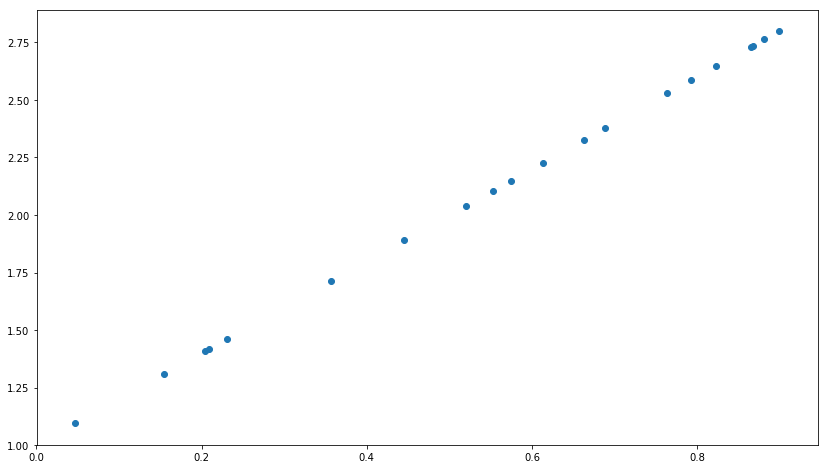

In [6]:
plt.scatter(inp, outp)

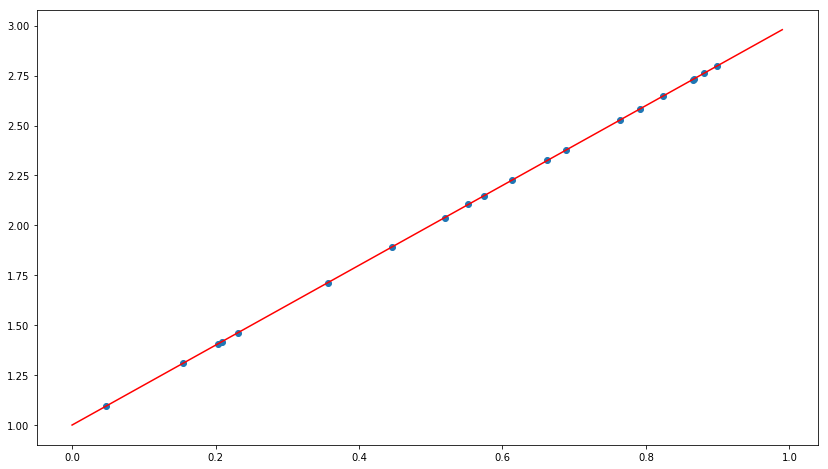

In [7]:
t = np.arange(0.0, 1.0, 0.01)
plt.plot(t, f(t), color='red')

plt.scatter(inp, outp)
plt.show()

In [8]:
inp = [0,0.2,1] + [random.random() for i in range(30)] 
outp = [1.4, 2.5, 2.6] + [f(x)+random.uniform(-0.3, 0.3) for x in inp[3:]]

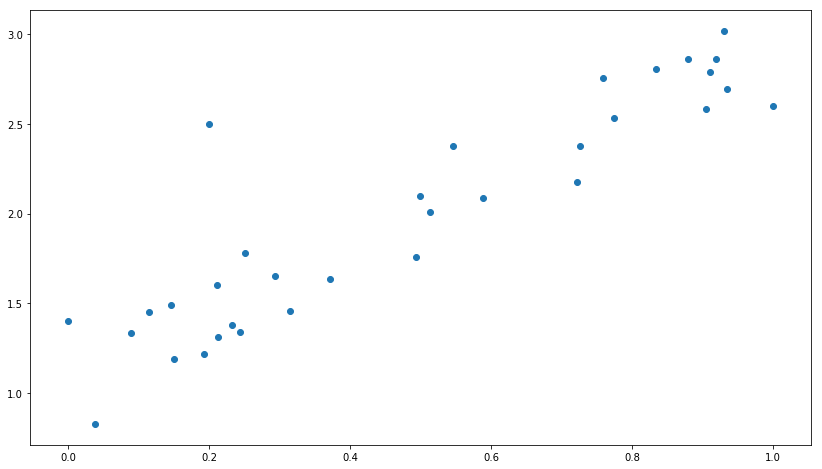

In [9]:
plt.scatter(inp, outp)

In [10]:
def line_through(a1,b1,a2,b2):
    return lambda x: (b1-b2)/(a1-a2)*x + (b1*a2 - b2*a1)/(a2 - a1)

l = line_through(inp[0],outp[0],inp[2],outp[2])

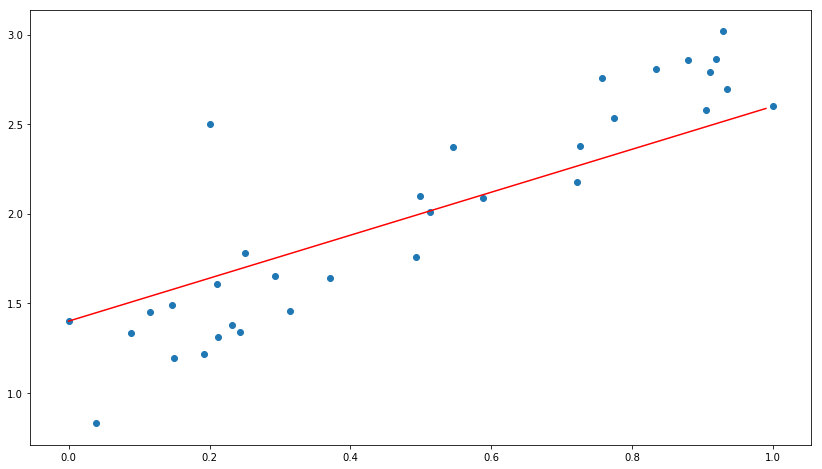

In [11]:
t = np.arange(0.0, 1.0, 0.01)
plt.plot(t, l(t), color='red')

plt.scatter(inp, outp)
plt.show()

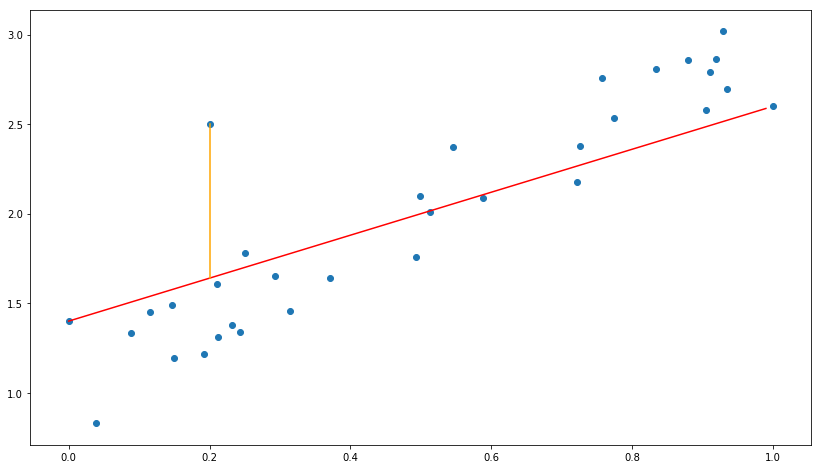

In [12]:
plt.plot(t, l(t), color='red')
plt.plot([inp[1],inp[1]],[outp[1],l(inp[1])], color='orange')

plt.scatter(inp, outp)
plt.show()

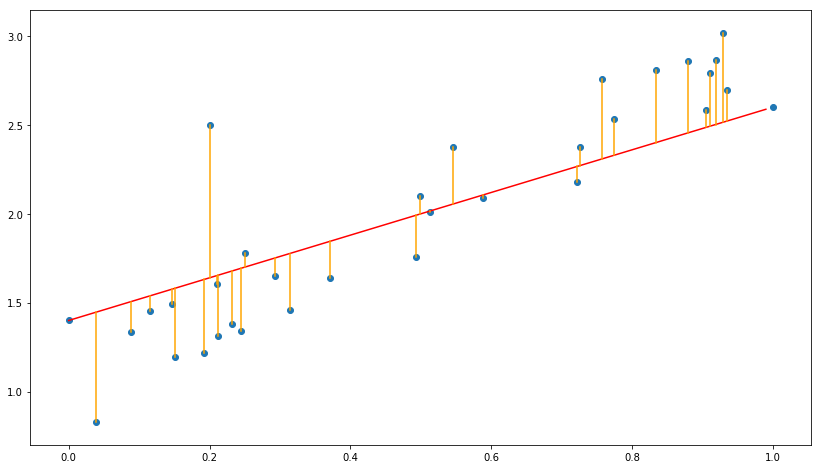

In [13]:
plt.plot(t, l(t), color='red')

for i in range(len(inp)):
    plt.plot([inp[i],inp[i]],[outp[i],l(inp[i])], color='orange')

plt.scatter(inp, outp)
plt.show()

In [14]:
def aproximation(w,b,x):
    return w*x+b

def total_error_for(w,b):
    err = 0
    for i in range(len(inp)):
        err += abs(outp[i] - aproximation(w,b, inp[i]))
    return err

In [15]:
from mpl_toolkits.mplot3d import Axes3D

def display_surface_for(f, xrange=(-1,1), yrange=(-1,1), view=(50,-35)):
    x1, x2 = xrange
    y1, y2 = yrange
    xs = (x2 - x1)/40
    ys = (y2 - y1)/40
    
    X = np.array([[x for x in np.arange(x1,x2,xs)] for y in np.arange(y1,y2,ys)])
    Y = np.array([[y for x in np.arange(x1,x2,xs)] for y in np.arange(y1,y2,ys)])
    Z = np.array([[f(x,y) for x in np.arange(x1,x2,xs)] for y in np.arange(y1,y2,ys)])

    ax = Axes3D(plt.gcf())
    viewx, viewy = view
    ax.view_init(viewx, viewy)
    ax.plot_surface(X,Y,Z, cmap='tab20c', shade=True)

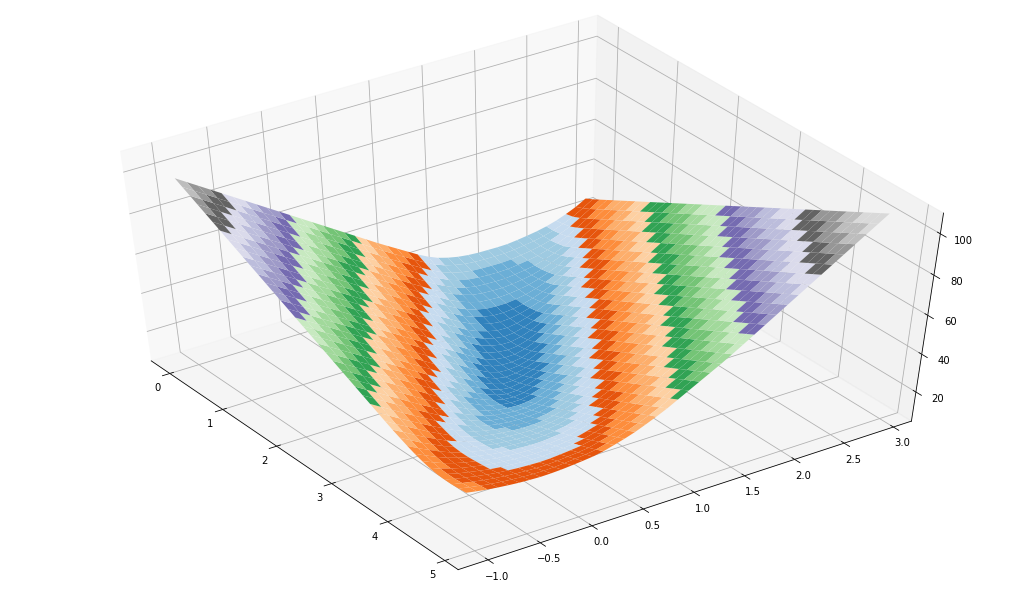

In [16]:
display_surface_for(total_error_for, xrange=(0,5), yrange=(-1,3))

In [17]:
import scipy.optimize as optimize

result = optimize.minimize(lambda x: total_error_for(x[0],x[1]), [0,0])
W,B = result.x

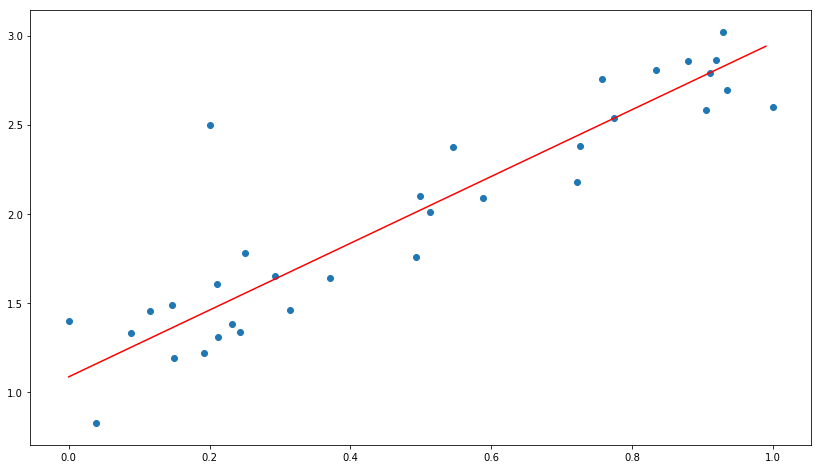

In [18]:
t = np.arange(0.0, 1.0, 0.01)
lr = lambda x: W*x+B

plt.plot(t, lr(t), color='red')

plt.scatter(inp, outp)
plt.show()

# Fitting curves

In [19]:
import math
def f(x):
    return 3*math.sin(13*x)

In [20]:
inp = [random.random() for i in range(100)]
outp = [f(x)+random.uniform(-0.3, 0.3) for x in inp]

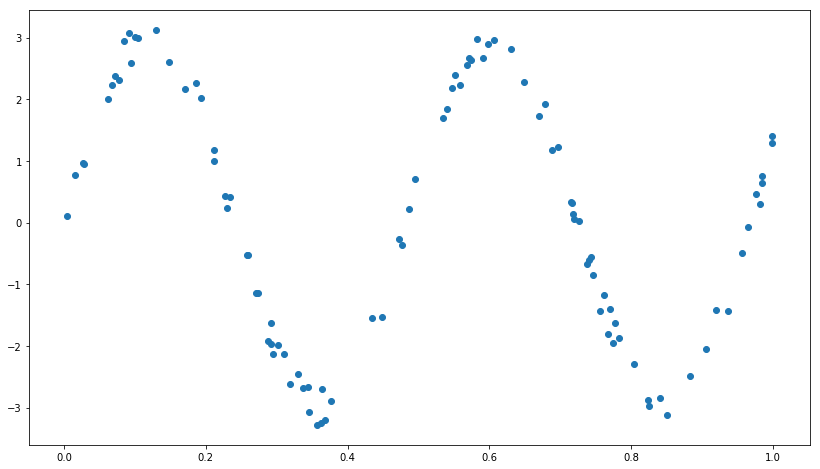

In [21]:
plt.scatter(inp, outp)

In [22]:
def aproximation(a,b,x):
    return a*math.sin(b*x)

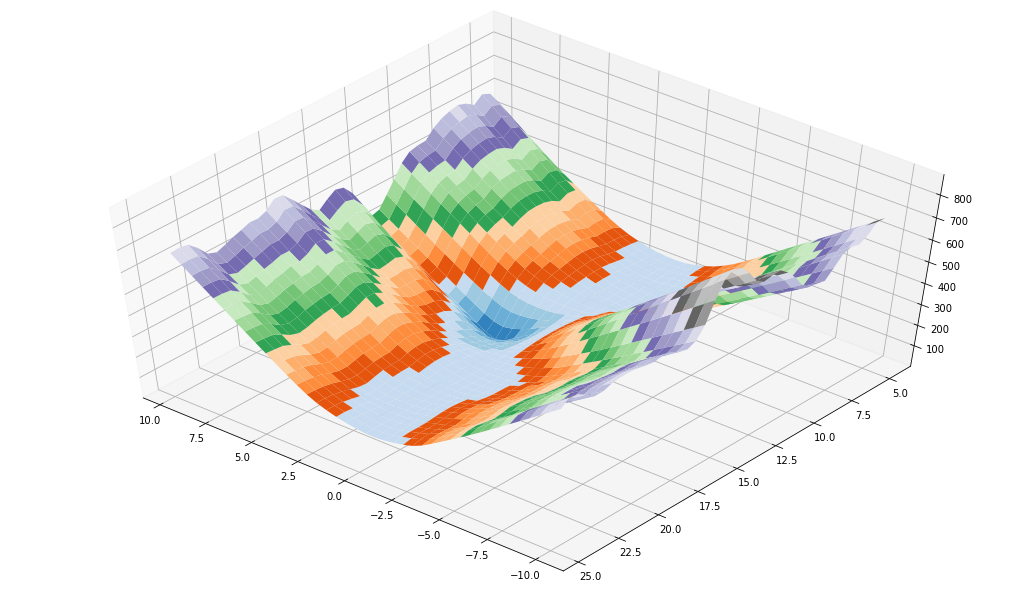

In [23]:
display_surface_for(total_error_for, xrange=(-10,10), yrange=(5,25), view=(54,130))

In [24]:
result = optimize.minimize(lambda x: total_error_for(x[0],x[1]), [0,11])
A,B = result.x
print(A,B)

2.90355282423 13.019437972


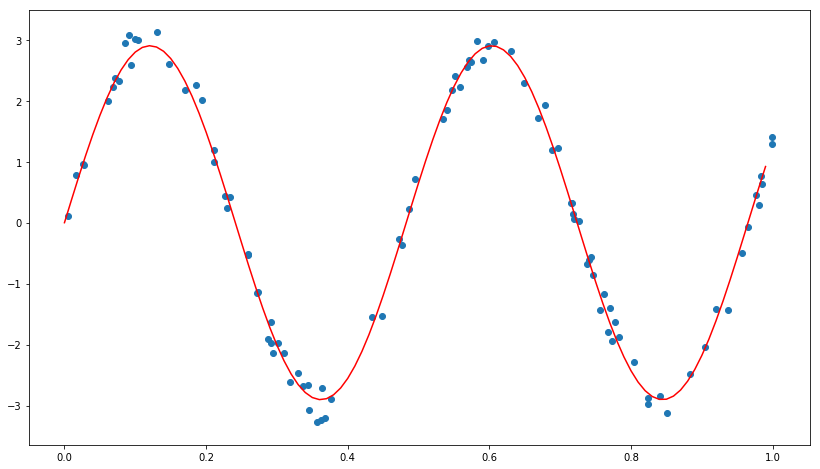

In [25]:
t = np.arange(0.0, 1.0, 0.01)
lr = lambda x: np.vectorize(aproximation)(A,B,x)

plt.plot(t, lr(t), color='red')

plt.scatter(inp, outp)
plt.show()

# A generic aproximation function

In [26]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0

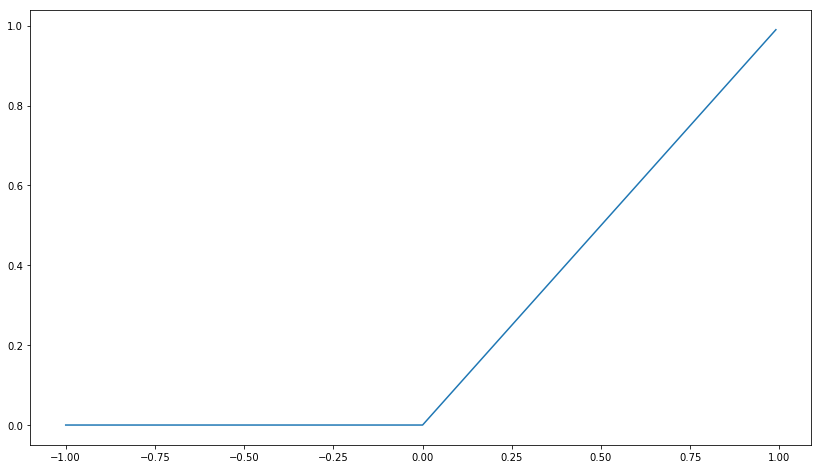

In [27]:
t = np.arange(-1.0, 1.0, 0.01)
plt.plot(t, np.vectorize(relu, otypes=[np.float])(t))

In [28]:
def combined(x):
    return 1 - relu(4*x+1) - relu(-3*x+1.5) + 3*relu(x-1)

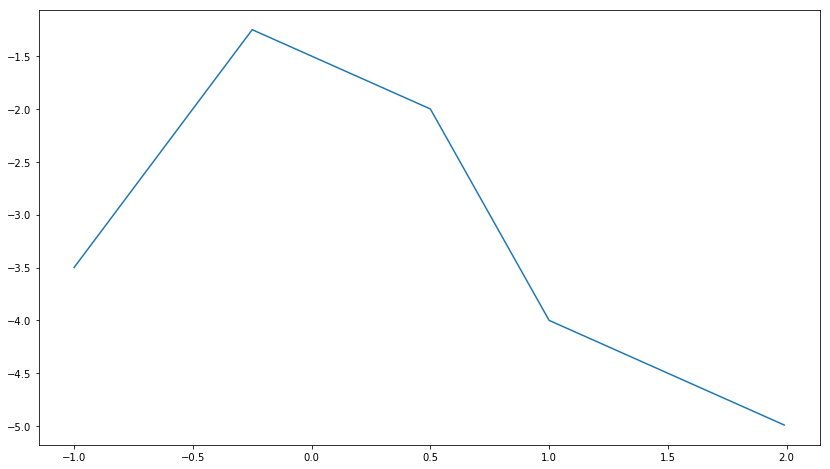

In [29]:
t = np.arange(-1.0, 2.0, 0.01)
plt.plot(t, np.vectorize(combined, otypes=[np.float])(t))

# Keras

In [30]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Nadam

model = Sequential([
    Dense(2000, input_shape=(1,)),
    Activation('relu'),
    Dense(2000),
    Activation('relu'),
    Dense(1)
])

opt = Nadam(lr=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.06)

model.compile(optimizer=opt,loss='mean_squared_error')

Using TensorFlow backend.


In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2000)              4000      
_________________________________________________________________
activation_1 (Activation)    (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
activation_2 (Activation)    (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2001      
Total params: 4,008,001
Trainable params: 4,008,001
Non-trainable params: 0
_________________________________________________________________


In [32]:
more_inp = [random.random() for i in range(100000)]
more_outp = [f(x)+random.uniform(-0.3, 0.3) for x in more_inp]

In [33]:
opt.lr = 0.002
model.fit(inp, outp, epochs=6)
opt.lr = 0.02
model.fit(more_inp, more_outp, epochs=6)

Epoch 1/6
100/100 [==============================] - 0s - loss: 4.2306     
Epoch 2/6
100/100 [==============================] - 0s - loss: 3.8925     
Epoch 3/6
100/100 [==============================] - 0s - loss: 3.8810     
Epoch 4/6
100/100 [==============================] - 0s - loss: 3.8603     
Epoch 5/6
100/100 [==============================] - 0s - loss: 3.7932     
Epoch 6/6
100/100 [==============================] - 0s - loss: 3.7436     
Epoch 1/6
100000/100000 [==============================] - 13s - loss: 0.5360    
Epoch 2/6
100000/100000 [==============================] - 15s - loss: 0.0452    
Epoch 3/6
100000/100000 [==============================] - 14s - loss: 0.0431    
Epoch 4/6
100000/100000 [==============================] - 14s - loss: 0.0421    
Epoch 5/6
100000/100000 [==============================] - 14s - loss: 0.0403    
Epoch 6/6
100000/100000 [==============================] - 14s - loss: 0.0402    


In [34]:
#model.save_weights('/data/trained_models/sinus_curve.h5')

In [35]:
#model.load_weights('/data/trained_models/sinus_curve.h5')

In [36]:
t = np.arange(0.0, 1.0, 0.01)
v = model.predict(t).reshape((len(t),))

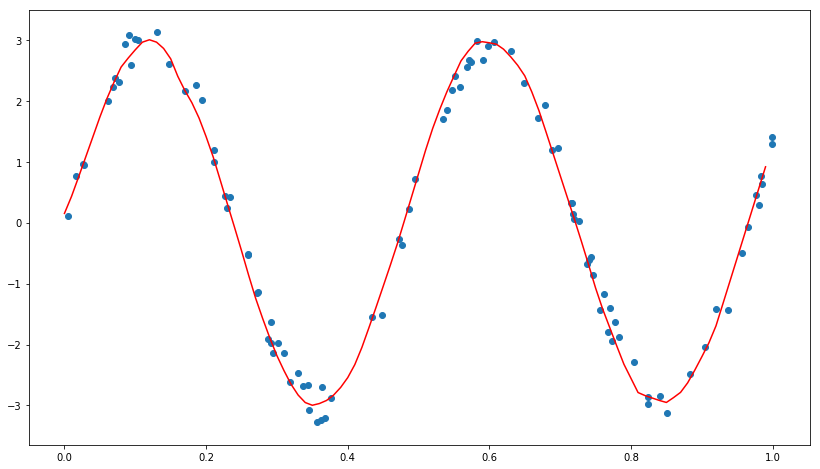

In [37]:
plt.plot(t, v, color='red')

plt.scatter(inp, outp)
plt.show()

# Convolutions

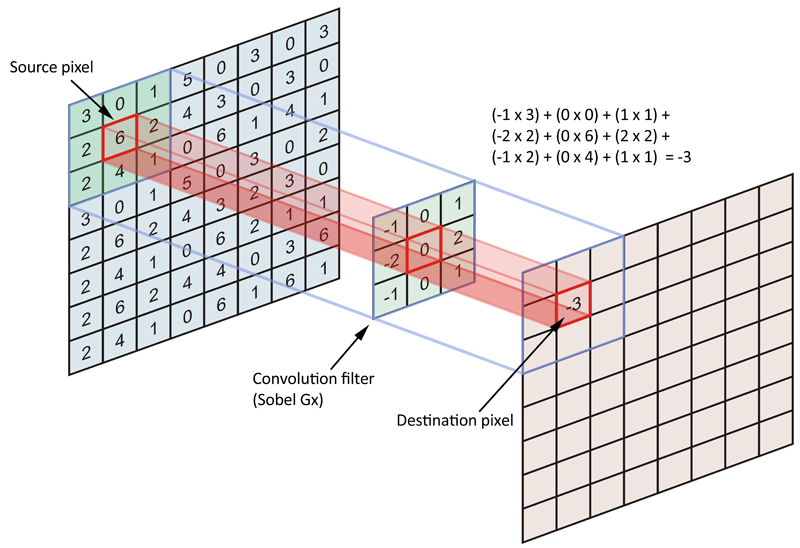

In [38]:
from Utils.mnist import MNISTImages
mnist = MNISTImages()
example_image = np.squeeze(mnist.train_input[4])

In [39]:
def show_images(images, titles = [], fontsize=18):
    rows = math.ceil(len(images)/4)
    
    f = plt.figure(figsize=(16,rows*5))
    for i in range(len(images)):
        sp = f.add_subplot(rows,4,i+1)
        
        if i < len(titles):
            sp.set_title(titles[i], fontsize=fontsize)
            
        sp.imshow(images[i], cmap='gray_r', vmin=0)
        
    plt.show()

In [40]:
from scipy.signal import convolve2d

def convolve_with(kernel, bias = 0):
    return convolve2d(example_image, kernel, mode='same') + np.ones(example_image.shape)*bias

In [41]:
unsharp_kernel = np.array([
    [ 1,  4,   6,  4, 1],
    [ 4, 16,  24, 16, 4],
    [ 6, 24,-476, 24, 6],
    [ 4, 16,  24, 16, 4],
    [ 1,  4,   6,  4, 1],
])/-256

square_blur_kernel = np.ones((5,5))

gaussian_blur_kernel = np.array([
    [ 1,  4,   6,  4, 1],
    [ 4, 16,  24, 16, 4],
    [ 6, 24,  36, 24, 6],
    [ 4, 16,  24, 16, 4],
    [ 1,  4,   6,  4, 1],
]) / 256

diagonal_kernel = np.array([
    [-1,-1,-1],
    [-1, 1, 1],
    [-1, 1, 0]
])

embos_kernel = np.array([
    [-4, 0, 0],
    [ 0, 0, 0],
    [ 0, 0, 4]
])

vertical_edge_kernel = -1*np.array([
    [ 0, 0, 0],
    [-1, 1, 0],
    [ 0, 0, 0]
])

edge_detection_kernel = np.array([
    [0, 1, 0],
    [1,-4, 1],
    [0, 1, 0]
])

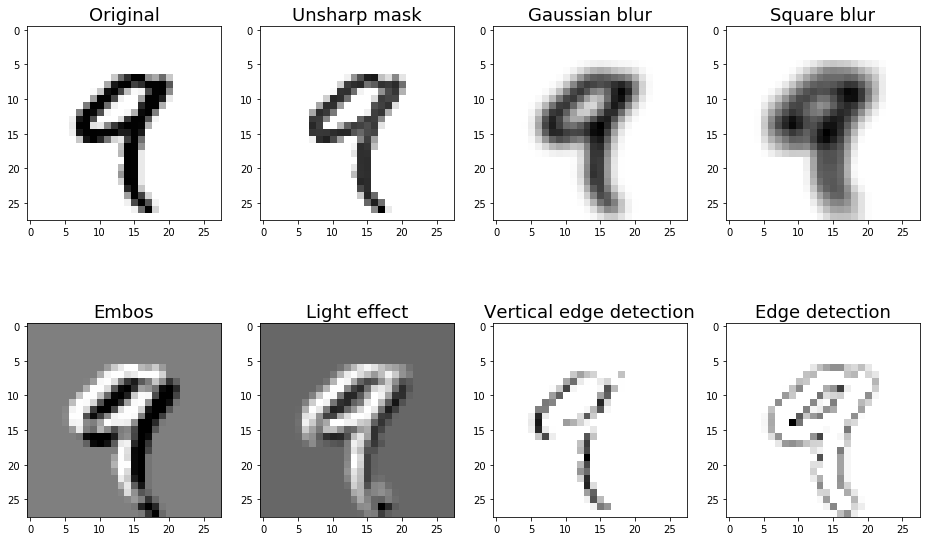

In [42]:
show_images([
    example_image,
    convolve_with(unsharp_kernel),
    convolve_with(gaussian_blur_kernel),
    convolve_with(square_blur_kernel),
    convolve_with(embos_kernel,4),
    convolve_with(diagonal_kernel,3),
    convolve_with(vertical_edge_kernel),
    convolve_with(edge_detection_kernel),
], titles = ['Original', 'Unsharp mask', 'Gaussian blur', 'Square blur', 'Embos', 'Light effect', 'Vertical edge detection', 'Edge detection'])

# Image classification

In [51]:
mnist.train_labels[4]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [43]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D


model = Sequential([
    BatchNormalization(input_shape=(28,28,1), axis=3),
    Conv2D(10,(3,3), padding='same'),
    Activation('relu'),
    Conv2D(10,(3,3), padding='same'),
    Activation('relu'),
    BatchNormalization(axis=3),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(20,(3,3), padding='same'),
    Activation('relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.45),
    Dense(10),
    Activation('softmax')
])

opt = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.006)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
from keras.preprocessing import image

train_generator = image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
).flow(mnist.train_input, mnist.train_labels, batch_size=512)

test_generator = image.ImageDataGenerator().flow(mnist.test_input, mnist.test_labels)

In [45]:
model.fit_generator(
    train_generator, 
    epochs=4, 
    steps_per_epoch=117, 
    validation_data=test_generator, 
    validation_steps=len(mnist.test_labels)
)

Epoch 1/4
117/117 [==============================] - 62s - loss: 1.0807 - acc: 0.6522 - val_loss: 1.5160 - val_acc: 0.8595
Epoch 2/4
117/117 [==============================] - 60s - loss: 0.3504 - acc: 0.8913 - val_loss: 0.5759 - val_acc: 0.9665
Epoch 3/4
117/117 [==============================] - 60s - loss: 0.2568 - acc: 0.9228 - val_loss: 0.1462 - val_acc: 0.9780
Epoch 4/4
117/117 [==============================] - 60s - loss: 0.2102 - acc: 0.9373 - val_loss: 0.0638 - val_acc: 0.9846


In [46]:
#model.save_weights('/data/trained_models/mnist_for_talk.h5')

In [47]:
#model.load_weights('/data/trained_models/mnist_for_talk.h5')

In [48]:
preview_generator = image.ImageDataGenerator().flow(
    mnist.test_input, 
    mnist.test_labels, 
    batch_size=12, 
    shuffle=True
)

imgs, original_label_ids = next(preview_generator)

preds = model.predict(imgs)
labels = (np.argmax(preds, axis=1))

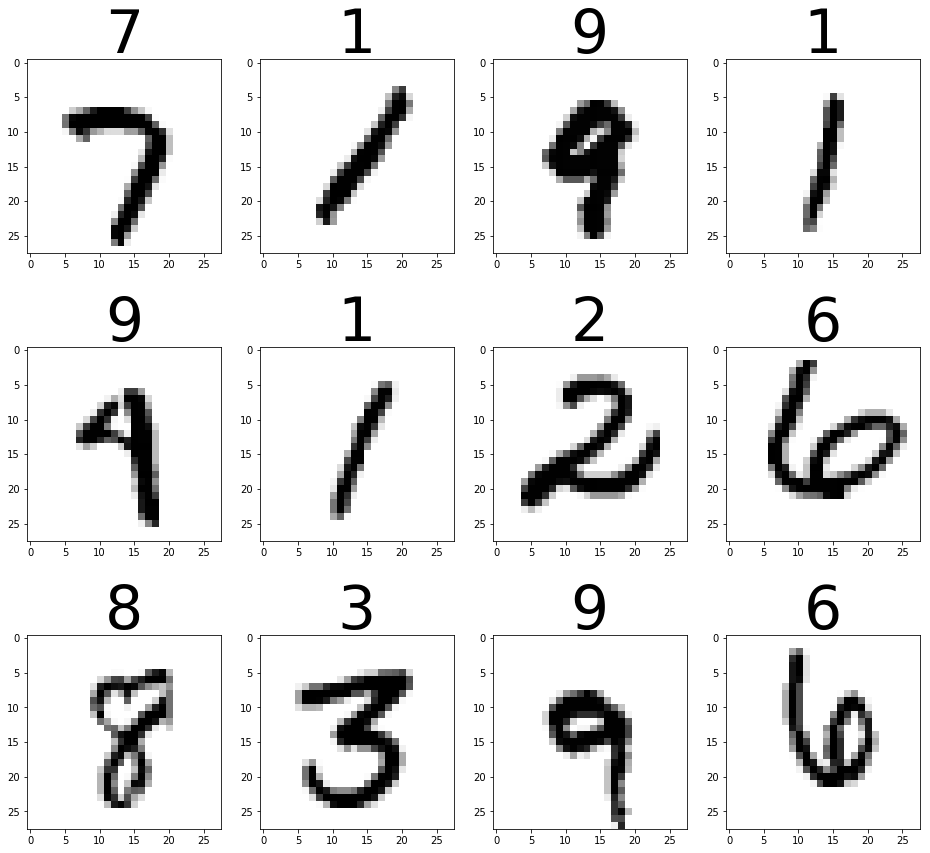

In [49]:
show_images(np.squeeze(imgs), titles=labels, fontsize=60)